ไฟล์นี้เป็นการส่งครั้งที่ 2 เนื่องจากครั้งแรกทำการวิเคราะห์เทียบ Decision tree กับ Random Forest แต่ Random Forest มีในสไลด์แล้ว เลยเปลี่ยนเป็นเทียบ Decision tree กับ  Gradient Boosting Machines (GBM) แทนค่ะ

ตอนรันไฟล์แรกใหม่วันนี้พบปัญหาการเปิดไฟล์ .csv อันเก่า เลยโหลดข้อมูลใหม่จาก colab ของอาจารย์ ซึ่งข้อมูลต่างกันในส่วนของหัวข้อ ไม่มั่นใจว่ามีผลต่อตัวโมเดล Decision Tree ที่ทำไว้ตอนแรกไหมค่ะ 😥

In [ ]:
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
# โหลดไฟล์ไม่ได้ ขออนุญาตใช้ไฟล์อาจารย์

# !wget --no-check-certificate 'https://drive.google.com/file/d/1d_sPCw26jtACd4C7-fRHyT5SH97Tl6r6/view?usp=drive_link' -O diabetes.csv

# df = pd.read_csv("diabetes.csv")
# print(df)

# from google.colab import files
# uploaded = files.upload()

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH' -O diabetes.csv


--2024-07-16 20:18:24--  https://docs.google.com/uc?export=download&id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH
Resolving docs.google.com (docs.google.com)... 74.125.23.138, 74.125.23.100, 74.125.23.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.23.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH&export=download [following]
--2024-07-16 20:18:25--  https://drive.usercontent.google.com/download?id=1qNpoW6TcRxbt7tSzwgoyLJoLwlUijaGH&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.157.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26848 (26K) [application/octet-stream]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  26.22K  --.-KB/s    in 0s   

In [ ]:
df = pd.read_csv("diabetes.csv")
print(df)

     PatientID  NumberOfPregnant  Glucose  BloodPressure  SkinThickness  \
0            1                 6      148             72             35   
1            2                 1       85             66             29   
2            3                 8      183             64              0   
3            4                 1       89             66             23   
4            5                 0      137             40             35   
..         ...               ...      ...            ...            ...   
763        764                10      101             76             48   
764        765                 2      122             70             27   
765        766                 5      121             72             23   
766        767                 1      126             60              0   
767        768                 1       93             70             31   

     Insulin   BMI  DiabetesPedigree  Age  HasDiabetes  
0          0  33.6             0.627   50 

# ให้นิสิตเขียนโปรแกรมเพื่อจําแนกผู้ป่วยเบาหวาน โดยประยุกต์เทคนิค Classification ของ Python มา 2 เทคนิค และวิเคราะห์เปรียบเทียบผลลัพธ์ที่ได้

## **1. ใช้ Decision Tree**

In [ ]:
# Clean Data ก่อน
df.isnull().sum()

PatientID           0
NumberOfPregnant    0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
HasDiabetes         0
dtype: int64

In [ ]:
# Decision tree จะทำงานกับตัวเลขเท่านั้น ใน Data นี้เป็นตัวเลขอยู่แล้วไปขั้นตอนต่อไปเลย

# กำหนด Feature
features = ['NumberOfPregnant', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigree', 'Age']
X = df[features]
y = df['HasDiabetes'] # Lable (เฉลย)

# กำหนดอัลกอริทึม
dtree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
dtree = dtree.fit(X_train, y_train) # (input, lable) เรียนรู้ค่าจาก features X และค่าเฉลย y

y_predict = dtree.predict(X_test)
print(X_test)
print(y_predict)



     NumberOfPregnant  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
343                 5      122             86              0        0  34.7   
728                 2      175             88              0        0  22.9   
73                  4      129             86             20      270  35.1   
254                12       92             62              7      258  27.6   
741                 3      102             44             20       94  30.8   
..                ...      ...            ...            ...      ...   ...   
582                12      121             78             17        0  26.5   
652                 5      123             74             40       77  34.1   
83                  0      101             65             28        0  24.6   
556                 1       97             70             40        0  38.1   
267                 2      128             64             42        0  40.0   

     DiabetesPedigree  Age  
343             0.290 

In [ ]:
# คำนวณหาความแม่นยำ

acc = accuracy_score(y_test, y_predict)
print(f"Decision Tree accuracy score : {acc:.2f}\n")

print(confusion_matrix(y_test, y_predict))

Decision Tree accuracy score : 0.69

[[79 29]
 [19 27]]


In [ ]:
class_report = classification_report(y_test, y_predict, target_names=['0', '1'])
print(class_report)

              precision    recall  f1-score   support

           0       0.81      0.73      0.77       108
           1       0.48      0.59      0.53        46

    accuracy                           0.69       154
   macro avg       0.64      0.66      0.65       154
weighted avg       0.71      0.69      0.70       154



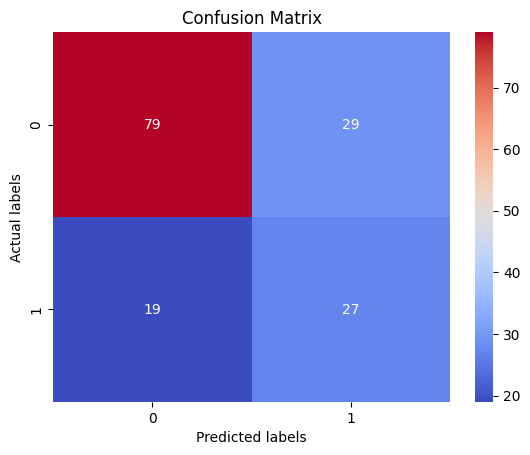

In [ ]:
# ทำ Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

## **2. ใช้ Gradient Boosting**

คือ โมเดลที่รวมหลาย ๆ โมเดลเข้าด้วยกัน ด้วยการเพิ่ม Boosting ทำให้ลดความผิดพลาดในการทำนาย

In [ ]:
# เตรียมไฟล์
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# กำหนด features

X = df.drop(['PatientID','HasDiabetes'], axis=1)
y = df.HasDiabetes

# กำหนดอัลกอริทึม
model = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [ ]:
# คำนวณหาความแม่นยำ
acc = accuracy_score(y_test, y_predict)
print(f"Gradient Boosting accuracy score : {acc:.2f}\n")

print(confusion_matrix(y_test, y_predict))

Gradient Boosting accuracy score : 0.75

[[85 23]
 [16 30]]


In [ ]:
class_report = classification_report(y_test, y_predict, target_names=['0', '1'])
print(class_report)

              precision    recall  f1-score   support

           0       0.84      0.79      0.81       108
           1       0.57      0.65      0.61        46

    accuracy                           0.75       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



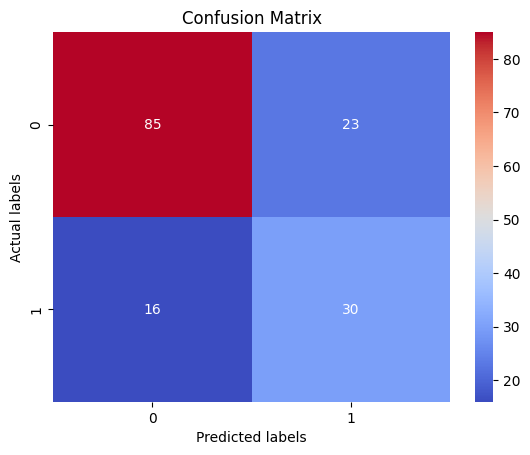

In [ ]:
# ทำ Heat Map
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_predict)
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap="coolwarm")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

## **วิเคราะห์เปรียบเทียบผลลัพธ์**

> **Decision Tree accuracy score : 0.69**


> **Gradient Boosting accuracy score : 0.75**

โมเดล Decision Tree มีความแม่นยำน้อยกว่า โมเดล Gradient Boosting
แต่โมเดล Decision tree มีความเรียบง่าย เข้าใจง่าย และรวดเร็วกว่า

หากเปรียบเทียบด้วยการเทรนที่มีฐานข้อมูลขนาดใหญ่กว่านี้ จะเห็นความต่างชัดเจน เพราะโมเดล Gradient Boosting จะทำงานช้ากว่ามาก เนื่องจากผ่านการคิดคำนวณหลายขั้นตอนกว่า จึงมีความแม่นยำสูงกว่าค่ะ



